# *1. Preprocesamiento*

Paquetes:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Tipos de datos:

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Verificando Datos perdidos:

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Codificación de la variable respuesta:

In [6]:
X=df.loc[:,'Age': 'ST_Slope']
Y=df[['HeartDisease']]
X.head(), Y.head()

(   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  
 0              N      0.0       Up  
 1              N      1.0     Flat  
 2              N      0.0       Up  
 3              Y      1.5     Flat  
 4              N      0.0       Up  ,
    HeartDisease
 0             0
 1             1
 2             0
 3             1
 4             0)

Ahora estandarizaré las variables numéricas y tambien convertiré las categoricas en dummy

In [7]:
X['Sex'] = X['Sex'].astype('category')
X['ChestPainType'] = X['ChestPainType'].astype('category')
X['FastingBS'] = X['FastingBS'].astype('category')
X['RestingECG'] = X['RestingECG'].astype('category')
X['ExerciseAngina'] = X['ExerciseAngina'].astype('category')
X['ST_Slope'] = X['ST_Slope'].astype('category')

Y['HeartDisease'] = Y['HeartDisease'].astype('category')

X.dtypes, Y.dtypes

C:\Users\51946\AppData\Local\Temp\ipykernel_13676\2493949615.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['HeartDisease'] = Y['HeartDisease'].astype('category')


(Age                  int64
 Sex               category
 ChestPainType     category
 RestingBP            int64
 Cholesterol          int64
 FastingBS         category
 RestingECG        category
 MaxHR                int64
 ExerciseAngina    category
 Oldpeak            float64
 ST_Slope          category
 dtype: object,
 HeartDisease    category
 dtype: object)

ahora que "gender" es categórico, lo convertimos en dummy

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [9]:
lab_sex = LabelEncoder()
lab_fast = LabelEncoder()
lab_exe = LabelEncoder()

X_encoded = X.copy()

X_encoded['Sex'] = lab_sex.fit_transform(X_encoded['Sex'])
X_encoded['FastingBS'] = lab_fast.fit_transform(X_encoded['FastingBS'])
X_encoded['ExerciseAngina'] = lab_exe.fit_transform(X_encoded['ExerciseAngina'])

X_encoded1 = pd.get_dummies(X_encoded, columns=['ChestPainType','RestingECG','ST_Slope'])

In [10]:
X_encoded1

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,False,True,False,False,True,False,False,False,True,False


Ahora podemos continuar con el balanceo

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded1, Y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 18), (184, 18), (734, 1), (184, 1))

Ahora estandarizamos los valores numéricos

In [13]:
# Identificar columnas numéricas continuas (sin incluir las dummies)
cols_no_escalar = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal','RestingECG_ST','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up']
cols_escalar = [col for col in X_train.columns if col not in cols_no_escalar]

# Escalar solo las columnas numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[cols_escalar] = scaler.fit_transform(X_train[cols_escalar])
X_test_scaled = X_test.copy()
X_test_scaled[cols_escalar] = scaler.transform(X_test[cols_escalar])

In [14]:
X_train_scaled.shape, X_test_scaled.shape

((734, 18), (184, 18))

In [15]:
X_train_scaled.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,1,-0.708985,0.372803,1,2.284353,0,-0.097061,False,False,True,False,False,True,False,True,False,False
25,-1.886236,1,-0.166285,0.086146,0,1.652241,0,-0.836286,False,False,True,False,False,True,False,False,False,True
84,0.250993,1,0.919115,0.123134,1,-0.441628,1,0.087745,True,False,False,False,False,True,False,False,True,False
10,-1.779375,0,-0.166285,0.104640,0,0.229991,0,-0.836286,False,False,True,False,False,True,False,False,False,True
344,-0.283314,1,-0.708985,-1.846478,1,-1.271274,0,-0.836286,True,False,False,False,False,True,False,False,True,False


In [16]:
X_test_scaled.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.999024,0,0.376415,-0.043312,0,1.691748,0,-0.836286,False,True,False,False,False,True,False,False,False,True
30,-0.069591,1,0.647765,2.943471,0,-0.244093,0,-0.836286,False,False,True,False,False,True,False,False,True,False
377,1.212747,1,1.461816,-1.846478,1,-0.560148,0,0.272552,True,False,False,False,False,False,True,False,True,False
535,0.250993,1,-0.166285,-1.846478,0,-0.560148,1,0.087745,True,False,False,False,True,False,False,False,True,False
807,0.037270,1,-1.360226,1.010846,0,0.783088,0,-0.836286,False,True,False,False,False,True,False,False,False,True


In [17]:
y_train["HeartDisease"].value_counts()

X_train_bal = X_train_scaled.copy()
y_train_bal = y_train.copy()


In [18]:
X_train_bal.shape, X_test_scaled.shape, y_train_bal.shape, y_test.shape

((734, 18), (184, 18), (734, 1), (184, 1))

# Aplicacion de Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.model_selection import cross_val_score, StratifiedKFold


mod_nb = GaussianNB()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores1 = cross_val_score(mod_nb, X_train_bal, y_train_bal, cv=kfold, scoring='accuracy')
mod_nb.fit(X_train_bal, y_train_bal)
print("Precisión promedio:", scores1.mean())

Precisión promedio: 0.8583077066443016


c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataC

In [39]:
ypred_nb = mod_nb.predict(X_test_scaled)
ypred_nb

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [40]:
accuracy_nb = accuracy_score(y_test, ypred_nb)
balanced_acc_nb = balanced_accuracy_score(y_test, ypred_nb)
precision_nb = precision_score(y_test, ypred_nb, zero_division=0)
recall_nb = recall_score(y_test, ypred_nb, zero_division=0)
f1_nb = f1_score(y_test, ypred_nb, zero_division=0)

tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, ypred_nb).ravel()
specificity_nb = tn_nb / (tn_nb + fp_nb)


print(f"Exactitud (Accuracy): {accuracy_nb:.3f}")
print(f"Exactitud balanceada: {balanced_acc_nb:.3f}")
print(f"Precisión (Precision): {precision_nb:.3f}")
print(f"Sensibilidad (Recall): {recall_nb:.3f}")
print(f"Especificidad: {specificity_nb:.3f}")
print(f"F1-score: {f1_nb:.3f}")

Exactitud (Accuracy): 0.859
Exactitud balanceada: 0.862
Precisión (Precision): 0.909
Sensibilidad (Recall): 0.841
Especificidad: 0.883
F1-score: 0.874


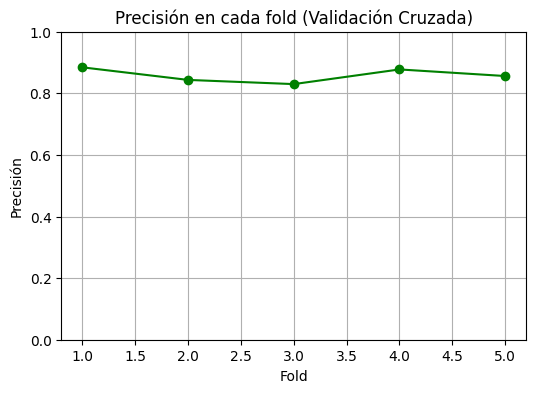

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), scores1 ,marker='o', linestyle='-', color='green')
plt.title('Precisión en cada fold (Validación Cruzada) Naive Bayes')
plt.xlabel('Fold')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# Regresion logistica

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

mod_lr = LogisticRegression(max_iter = 50, solver = "liblinear")
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores2 = cross_val_score(mod_lr, X_train_bal, y_train_bal, cv=kfold, scoring='accuracy')
mod_lr.fit(X_train_bal, y_train_bal)
print("Precisión promedio:", scores.mean())

Precisión promedio: 0.8678501537601342


c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataC

In [51]:
ypred_lr = mod_lr.predict(X_test_scaled)
ypred_lr

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [53]:
accuracy_lr = accuracy_score(y_test, ypred_lr)
balanced_acc_lr = balanced_accuracy_score(y_test, ypred_lr)
precision_lr = precision_score(y_test, ypred_lr, zero_division=0)
recall_lr = recall_score(y_test, ypred_lr, zero_division=0)
f1_lr = f1_score(y_test, ypred_lr, zero_division=0)

tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, ypred_lr).ravel()
specificity_lr = tn_lr / (tn_lr + fp_lr)


print(f"Exactitud (Accuracy): {accuracy_lr:.3f}")
print(f"Exactitud balanceada: {balanced_acc_lr:.3f}")
print(f"Precisión (Precision): {precision_lr:.3f}")
print(f"Sensibilidad (Recall): {recall_lr:.3f}")
print(f"Especificidad: {specificity_lr:.3f}")
print(f"F1-score: {f1_lr:.3f}")

Exactitud (Accuracy): 0.853
Exactitud balanceada: 0.856
Precisión (Precision): 0.900
Sensibilidad (Recall): 0.841
Especificidad: 0.870
F1-score: 0.870


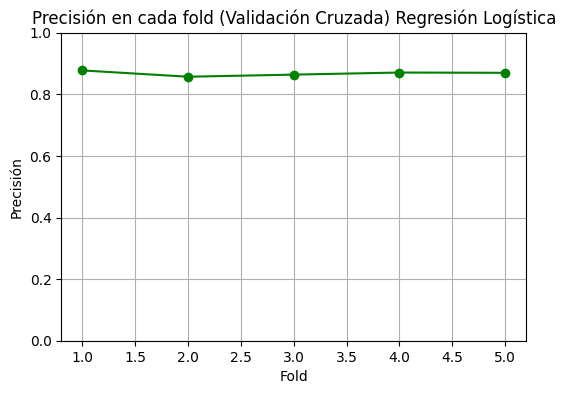

In [60]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), scores2 ,marker='o', linestyle='-', color='green')
plt.title('Precisión en cada fold (Validación Cruzada) Regresión Logística')
plt.xlabel('Fold')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(True)
plt.show()



# Aplicación del primer modelo *Redes Neuronales*

Importamos los paquetes:

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [72]:
X_train_t = torch.tensor(X_train_bal.values.astype(np.float32))
y_train_t = torch.tensor(y_train_bal.values.astype(np.float32)).view(-1, 1)
X_test_t = torch.tensor(X_test_scaled.values.astype(np.float32))
y_test_t = torch.tensor(y_test.values.astype(np.float32)).view(-1, 1)


In [73]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()   # salida entre 0 y 1
        )
    def forward(self, x):
        return self.model(x)

input_dim = X_train_t.shape[1]
model = NeuralNet(input_dim)

## Definir función perdida:

In [74]:
criterion = nn.BCELoss()                # pérdida binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Entrenamos al modelo:

In [75]:
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}/{epochs} - Pérdida: {loss.item():.4f}")

Época 10/100 - Pérdida: 0.6442
Época 20/100 - Pérdida: 0.5791
Época 30/100 - Pérdida: 0.5061
Época 40/100 - Pérdida: 0.4436
Época 50/100 - Pérdida: 0.3986
Época 60/100 - Pérdida: 0.3664
Época 70/100 - Pérdida: 0.3434
Época 80/100 - Pérdida: 0.3271
Época 90/100 - Pérdida: 0.3146
Época 100/100 - Pérdida: 0.3042


## Evaluamos su rendimiento:

In [45]:
model.eval()
with torch.no_grad():
    preds = model(X_test_t)
    preds_cls = (preds >= 0.5).float()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
# Convertir tensores a NumPy
y_true = y_test_t.numpy()
y_pred = preds_cls.numpy()
cm = confusion_matrix(y_true, y_pred)

In [47]:
accuracy = accuracy_score(y_true, y_pred)
balanced_acc = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # sensibilidad
# Si tus clases son binarias (0 y 1):
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
f1 = f1_score(y_true, y_pred)

print(f"Exactitud (Accuracy): {accuracy:.3f}")
print(f"Exactitud balanceada: {balanced_acc:.3f}")
print(f"Precisión (Precision): {precision:.3f}")
print(f"Sensibilidad (Recall): {recall:.3f}")
print(f"Especificidad: {specificity:.3f}")
print(f"F1-score: {f1:.3f}")

Exactitud (Accuracy): 0.859
Exactitud balanceada: 0.862
Precisión (Precision): 0.909
Sensibilidad (Recall): 0.841
Especificidad: 0.883
F1-score: 0.874


Tuneamos con 2 capas ocultas

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

# Arquitectura base
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.hidden1 = nn.Linear(input_size, 10)
        self.hidden2 = nn.Linear(10, 6)
        self.output = nn.Linear(6, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

In [49]:
input_dim = X_train_t.shape[1]
model2 = NeuralNet(input_dim)

Entrenando el modelo tuneado:

In [50]:
epochs = 100
for epoch in range(epochs):
    model2.train()
    optimizer.zero_grad()
    outputs = model2(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}/{epochs} - Pérdida: {loss.item():.4f}")

Época 10/100 - Pérdida: 0.7106
Época 20/100 - Pérdida: 0.7106
Época 30/100 - Pérdida: 0.7106
Época 40/100 - Pérdida: 0.7106
Época 50/100 - Pérdida: 0.7106
Época 60/100 - Pérdida: 0.7106
Época 70/100 - Pérdida: 0.7106
Época 80/100 - Pérdida: 0.7106
Época 90/100 - Pérdida: 0.7106
Época 100/100 - Pérdida: 0.7106


Vemos su predicción


In [51]:
model2.eval()
with torch.no_grad():
    preds = model2(X_test_t)
    preds_cls2 = (preds >= 0.5).float()

In [52]:
y_true = y_test_t.numpy()
y_pred2 = preds_cls2.numpy()
cm2 = confusion_matrix(y_true, y_pred2)

In [53]:
accuracy = accuracy_score(y_true, y_pred2)
balanced_acc = balanced_accuracy_score(y_true, y_pred2)
precision = precision_score(y_true, y_pred2)
recall = recall_score(y_true, y_pred2)  # sensibilidad
# Si tus clases son binarias (0 y 1):
TN, FP, FN, TP = cm2.ravel()
specificity = TN / (TN + FP)
f1 = f1_score(y_true, y_pred2)

print(f"Exactitud (Accuracy): {accuracy:.3f}")
print(f"Exactitud balanceada: {balanced_acc:.3f}")
print(f"Precisión (Precision): {precision:.3f}")
print(f"Sensibilidad (Recall): {recall:.3f}")
print(f"Especificidad: {specificity:.3f}")
print(f"F1-score: {f1:.3f}")

Exactitud (Accuracy): 0.353
Exactitud balanceada: 0.377
Precisión (Precision): 0.403
Sensibilidad (Recall): 0.234
Especificidad: 0.519
F1-score: 0.296


# Aplicación del segundo modelo *Random Forest*

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Creando el modelo:

In [63]:

rf = RandomForestClassifier(
    n_estimators=200,        # cantidad de árboles
    max_depth=None,          # profundidad (None = crece hasta que no haya mejora)
    min_samples_split=2,     # mínimo de muestras para dividir un nodo
    min_samples_leaf=1,      # mínimo de muestras por hoja
    random_state=21,         # reproducibilidad
    class_weight="balanced"  # útil si las clases están desbalanceadas
)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores3  = cross_val_score(rf, X_train_bal, y_train_bal, cv=kfold, scoring='accuracy')
# Entrenar el modelo
rf.fit(X_train_bal, y_train_bal)

c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\51946\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConvers

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
y_pred = rf.predict(X_test_scaled)

Probabilidades del target:

In [65]:
y_prob = rf.predict_proba(X_test_scaled)[:, 1]
y_prob

array([0.15 , 0.795, 0.93 , 0.98 , 0.02 , 0.685, 0.875, 0.135, 0.59 ,
       0.925, 0.595, 0.135, 0.705, 0.165, 0.89 , 0.775, 0.11 , 0.765,
       0.615, 0.29 , 0.735, 0.85 , 0.   , 0.57 , 0.72 , 0.91 , 0.005,
       0.705, 0.035, 0.005, 0.875, 0.08 , 0.46 , 0.895, 0.935, 0.34 ,
       0.985, 0.   , 0.87 , 0.75 , 0.75 , 0.635, 0.595, 0.025, 0.15 ,
       0.61 , 0.795, 0.96 , 0.995, 0.445, 0.125, 0.025, 0.93 , 0.965,
       0.49 , 0.16 , 0.405, 0.835, 0.495, 0.86 , 0.145, 0.105, 0.   ,
       0.94 , 0.065, 0.98 , 0.95 , 0.89 , 0.99 , 0.55 , 0.37 , 0.02 ,
       0.745, 0.48 , 0.085, 0.76 , 0.23 , 0.645, 0.095, 0.69 , 0.525,
       0.83 , 0.83 , 0.025, 0.955, 0.77 , 0.055, 0.7  , 0.04 , 0.165,
       0.185, 0.935, 0.955, 0.115, 0.49 , 0.   , 0.89 , 0.29 , 0.83 ,
       0.8  , 0.17 , 0.96 , 0.79 , 0.015, 0.61 , 0.87 , 0.035, 0.465,
       0.91 , 0.15 , 0.875, 0.95 , 0.12 , 0.27 , 0.925, 0.205, 0.79 ,
       0.005, 0.92 , 0.645, 0.94 , 0.745, 0.605, 0.705, 0.215, 0.005,
       0.12 , 0.4  ,

validación:

In [66]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)

print("Matriz de confusión:\n", cm)
print(f"Accuracy: {accuracy:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensibilidad): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-score: {f1:.3f}")

Matriz de confusión:
 [[69  8]
 [14 93]]
Accuracy: 0.880
Balanced Accuracy: 0.883
Precision: 0.921
Recall (Sensibilidad): 0.869
Specificity: 0.896
F1-score: 0.894


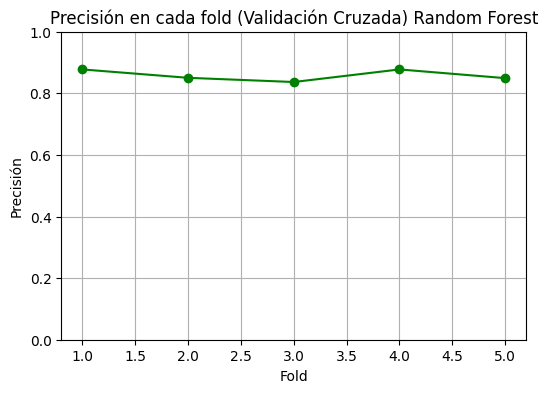

In [67]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), scores3 ,marker='o', linestyle='-', color='green')
plt.title('Precisión en cada fold (Validación Cruzada) Random Forest')
plt.xlabel('Fold')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Importancia de las variables:

In [59]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
features = np.array(X_train_bal.columns)

importance_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(importance_df)

             Variable  Importancia
17        ST_Slope_Up     0.134269
7             Oldpeak     0.113523
16      ST_Slope_Flat     0.102904
5               MaxHR     0.100329
3         Cholesterol     0.097342
6      ExerciseAngina     0.092561
0                 Age     0.080353
8   ChestPainType_ASY     0.070444
2           RestingBP     0.066460
1                 Sex     0.034883
9   ChestPainType_ATA     0.026206
4           FastingBS     0.022595
12     RestingECG_LVH     0.012514
10  ChestPainType_NAP     0.011790
13  RestingECG_Normal     0.011564
14      RestingECG_ST     0.009223
15      ST_Slope_Down     0.007255
11   ChestPainType_TA     0.005786


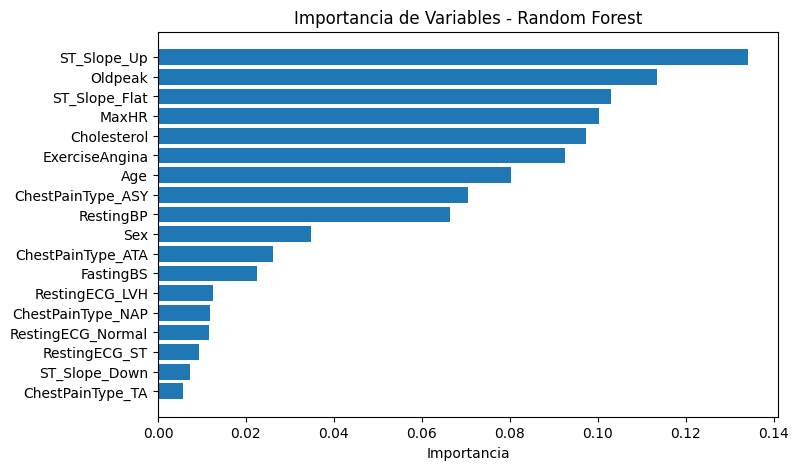

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(importance_df['Variable'], importance_df['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.show()